In [1]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("dataset/train.csv")

In [3]:
df.shape

(19950, 7)

In [4]:
df.head()

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0


In [5]:
df_f=df[df["class"]==3.0]

In [6]:
names=list(df["name"].unique())

In [7]:
names

['GARBAGE',
 'BAD_BILLBOARD',
 'SAND_ON_ROAD',
 'GRAFFITI',
 'POTHOLES',
 'CLUTTER_SIDEWALK',
 'CONSTRUCTION_ROAD',
 'BROKEN_SIGNAGE',
 'UNKEPT_FACADE',
 'FADED_SIGNAGE',
 'BAD_STREETLIGHT']

In [8]:
mapping_dic_name_class={}
mapping_dic_class_name={}
for name in names:
    df_name=df[df["name"]==name]
    classes=list(df_name["class"].unique())
    print(name,classes)
    mapping_dic_name_class[name]=classes[0]
    mapping_dic_class_name[classes[0]]=name

GARBAGE [3.0]
BAD_BILLBOARD [7.0]
SAND_ON_ROAD [8.0]
GRAFFITI [0.0]
POTHOLES [2.0]
CLUTTER_SIDEWALK [9.0]
CONSTRUCTION_ROAD [4.0]
BROKEN_SIGNAGE [5.0]
UNKEPT_FACADE [10.0]
FADED_SIGNAGE [1.0]
BAD_STREETLIGHT [6.0]


In [9]:
mapping_dic_class_name

{3.0: 'GARBAGE',
 7.0: 'BAD_BILLBOARD',
 8.0: 'SAND_ON_ROAD',
 0.0: 'GRAFFITI',
 2.0: 'POTHOLES',
 9.0: 'CLUTTER_SIDEWALK',
 4.0: 'CONSTRUCTION_ROAD',
 5.0: 'BROKEN_SIGNAGE',
 10.0: 'UNKEPT_FACADE',
 1.0: 'FADED_SIGNAGE',
 6.0: 'BAD_STREETLIGHT'}

In [10]:
mapping_dic_name_class

{'GARBAGE': 3.0,
 'BAD_BILLBOARD': 7.0,
 'SAND_ON_ROAD': 8.0,
 'GRAFFITI': 0.0,
 'POTHOLES': 2.0,
 'CLUTTER_SIDEWALK': 9.0,
 'CONSTRUCTION_ROAD': 4.0,
 'BROKEN_SIGNAGE': 5.0,
 'UNKEPT_FACADE': 10.0,
 'FADED_SIGNAGE': 1.0,
 'BAD_STREETLIGHT': 6.0}

In [11]:
all_files=df["image_path"].unique()
if not os.path.exists(os.path.join("dataset","annotations_all")):
    os.mkdir(os.path.join("dataset","annotations_all"))

In [12]:
# lets plot the square
font = ImageFont.truetype("FreeMono.ttf", 50)

0a4e0e88a05abd96670c8c0c3a67fc73.jpg contains 1 labels
width 1920 height 1080
xmin 400.0 ymin 248.0 xmax 1212.0 ymax 1072.0


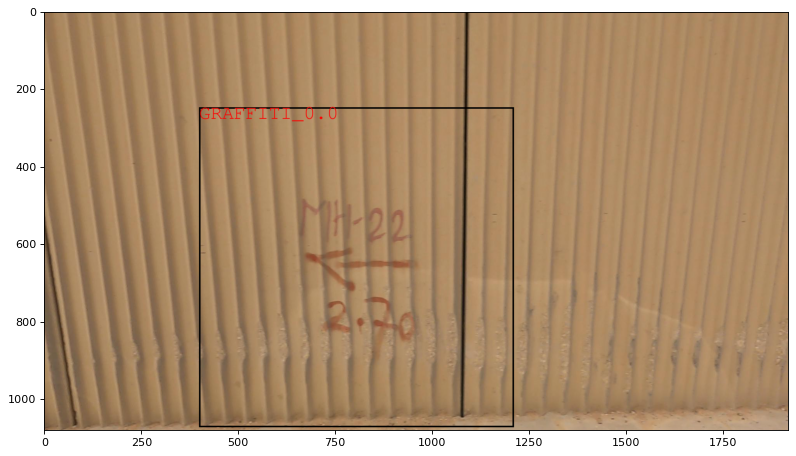

556fcdfe8e20050ac47e34bb69aae7c3.jpg contains 1 labels
width 1920 height 1080
xmin 550.0 ymin 124.0 xmax 888.0 ymax 572.0


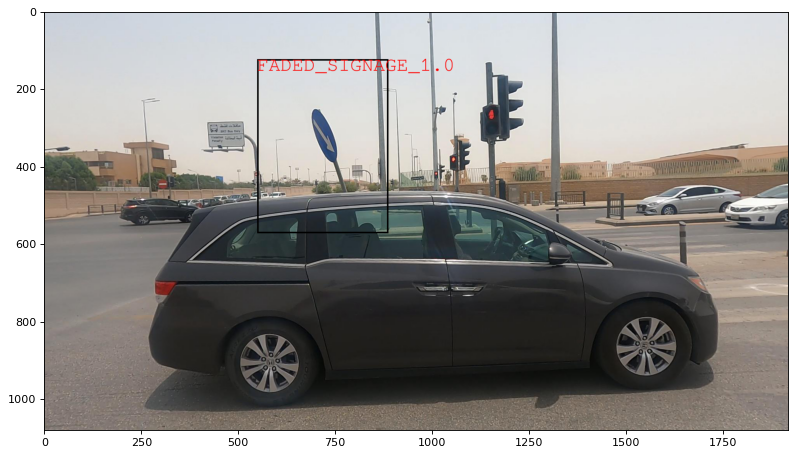

b08b7961553eac0b24c7e871836fad9c.jpg contains 6 labels
width 1920 height 1080
xmin 144.0 ymin 496.0 xmax 500.0 ymax 676.0
xmin 0 ymin 512.0 xmax 210.0 ymax 672.0
xmin 372.0 ymin 510.0 xmax 640.0 ymax 676.0
xmin 648.0 ymin 520.0 xmax 882.0 ymax 674.0
xmin 800.0 ymin 530.0 xmax 1030.0 ymax 660.0
xmin 1228.0 ymin 538.0 xmax 1398.0 ymax 664.0


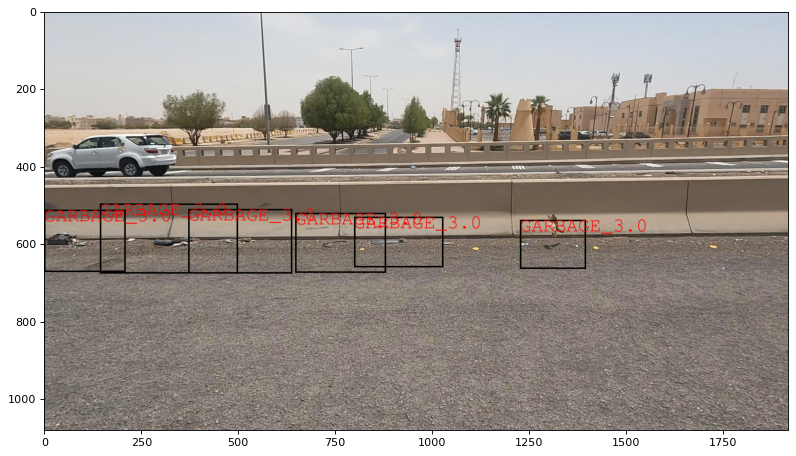

8ca1b825716ea6755180fde347ac79c1.jpg contains 3 labels
width 1920 height 1080
xmin 868.0 ymin 294.0 xmax 1064.0 ymax 392.0
xmin 942.0 ymin 262.0 xmax 1098.0 ymax 354.0
xmin 1130.0 ymin 246.0 xmax 1334.0 ymax 364.0


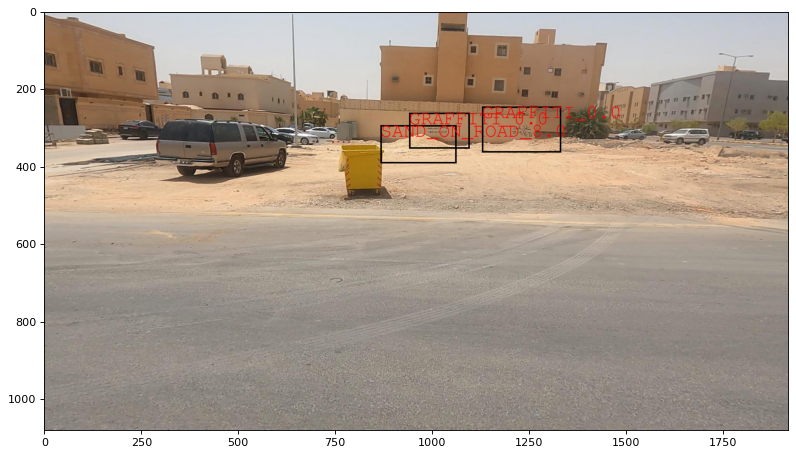

b08b7961553eac0b24c7e871836fad9c.jpg contains 6 labels
width 1920 height 1080
xmin 144.0 ymin 496.0 xmax 500.0 ymax 676.0
xmin 0 ymin 512.0 xmax 210.0 ymax 672.0
xmin 372.0 ymin 510.0 xmax 640.0 ymax 676.0
xmin 648.0 ymin 520.0 xmax 882.0 ymax 674.0
xmin 800.0 ymin 530.0 xmax 1030.0 ymax 660.0
xmin 1228.0 ymin 538.0 xmax 1398.0 ymax 664.0


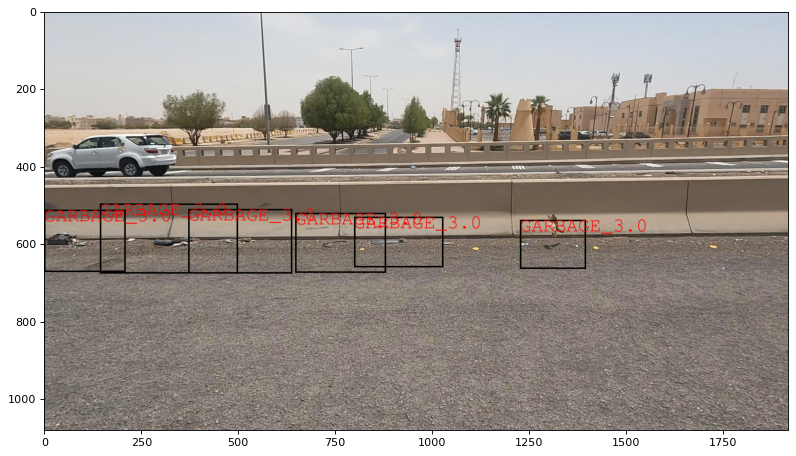

In [13]:





all_files=["0a4e0e88a05abd96670c8c0c3a67fc73.jpg","556fcdfe8e20050ac47e34bb69aae7c3.jpg",
           "b08b7961553eac0b24c7e871836fad9c.jpg","8ca1b825716ea6755180fde347ac79c1.jpg","b08b7961553eac0b24c7e871836fad9c.jpg"]

for img_fname in all_files:
    df_img_fname=df[df["image_path"]==img_fname]
    print(img_fname,"contains",df_img_fname.shape[0],"labels")
    # open the image here
    image_path=os.path.join("dataset","images",img_fname)
    img=Image.open(image_path)

    width,height=img.size
    print("width",width,"height",height)    
    center_width=width//2
    center_height=height//2
#     print(cols,rows)
#     plt.imshow(img)
    plotted_image = ImageDraw.Draw(img)
    for index,row in df_img_fname.iterrows():
        xmax=row["xmax"]*2
        xmin=row["xmin"]*2
        ymax=row["ymax"]*2
        ymin=row["ymin"]*2   
        if xmin<0:
            xmin=0
        if ymin<0:
            ymin=0
        if xmax>width:
            xmax=width
        if ymax>height:
            ymax=height
        print("xmin",xmin,"ymin",ymin,"xmax",xmax,"ymax",ymax)
        y0=height-xmax
        y1=height-xmin
        x0=width-ymax
        x1=width-ymin
#         plotted_image.rectangle(((x0,y0), (x1,y1)),fill ="#ffff33")  
        plotted_image.rectangle(((xmin,ymin),(xmax,ymax)),outline="black", width=4)  
        class_name=row["name"]
        class_val=str(row["class"])
        plotted_image.text((xmin, ymin - 10), class_name+"_"+class_val,fill ="red",font=font)
    plt.figure(figsize=(12, 10), dpi=80)
    plt.imshow(np.array(img))
    plt.show()    
    
        
#         
#         
#         print(image_path)
#         break
#     break

In [14]:
# separate the training files

In [15]:
import os
import shutil
import pandas as pd

In [16]:
image_names=list(df["image_path"].unique())

In [17]:
for i in image_names:
    shutil.copy(os.path.join('dataset','images',i),os.path.join('dataset','train_images'))
